# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Part 1: Merge multiple DataFrame objects along columns ( 5 pts )

Given the following temperature datasets, merge them to a large dataframe using pandas

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
# reads the csvs and stores them into pandas df's
old_temps = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv")
new_temps = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv")


# concatenates the two dataframes
combined_temps = pd.concat([old_temps,new_temps])


In [3]:
combined_temps.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [4]:
# loads the given data to a pandas df
fips_data = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")
station_data = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")

In [5]:
# creating a new df by copying the combined temps df
cleaned_data = combined_temps

# utilizes set_index and .stack() to "rotate" the monthly temperatures into one column
cleaned_data = cleaned_data.set_index(keys = ["ID","Year"]).stack()
cleaned_data = cleaned_data.reset_index()


# creates a new column with first two letters as ID
cleaned_data["FIPS 10-4"] = cleaned_data["ID"].str[0:2]


# merges fips and the df on FIPS column
cleaned_data = pd.merge(cleaned_data, fips_data, on = ["FIPS 10-4"])


# merges the df with station data on ID
cleaned_data = pd.merge(cleaned_data, station_data, on = ["ID"])


# renames a couple of columns
cleaned_data = cleaned_data.rename(columns = {"Name" : "Country_Name", 
                                              "NAME" : "Station_Name",
                                               "level_2": "Month", 0 :"Temperature"})


# changes VALUE# to just the integer representation of the month
cleaned_data["Month"] = cleaned_data["Month"].str[5:]


# drops the non required columns and converts degrees to normal
cleaned_data = cleaned_data.drop(["FIPS 10-4", "ISO 3166","STNELEV"], axis = 1)
cleaned_data["Temperature"] /= 100



cleaned_data


,ID,Year,Month,Temperature,Country_Name,LATITUDE,LONGITUDE,Station_Name
0,AG000060390,1901,1,10.34,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
1,AG000060390,1901,2,8.44,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
2,AG000060390,1901,3,11.64,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
3,AG000060390,1901,4,15.34,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
4,AG000060390,1901,5,15.64,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
...,...,...,...,...,...,...,...,...
1899682,ZAM00067663,2012,4,19.70,Zambia,-14.4500,28.467,KABWE_MILLIKEN
1899683,ZAM00067663,2012,5,18.50,Zambia,-14.4500,28.467,KABWE_MILLIKEN
1899684,ZAM00067663,2012,6,17.50,Zambia,-14.4500,28.467,KABWE_MILLIKEN
1899685,ZAM00067663,2015,12,24.85,Zambia,-14.4500,28.467,KABWE_MILLIKEN


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [6]:
def query_climate(df, country, year_begin, year_end, month):
    """Takes a dataframe and returns a new df with specified country, year-range, and month
    
    Parameters:
    df - a pandas df
    country - string, country by which we filter the data
    year_begin - int, starting value of year range
    year_end - int, ending value of year range
    month - int, month by which we filter the data
    
    Output:
    A pandas df that only has data which fit the given parameters
    """
    
    
    # gets the dataframe with only corresponding month and country
    output_df = df.query(f"Country_Name == '{country}' and Month == '{month}'")
    
    
    # filters for only the range of years we need to get
    year_filter = (output_df["Year"] >= year_begin) & (output_df["Year"] <= year_end)
    output_df = output_df[year_filter]
    
    
    # orders and gets the useful columns
    output_df = output_df[["Station_Name", "LATITUDE", "LONGITUDE", 
                           "Country_Name", "Year", "Month", "Temperature"]]
    
    
    return output_df


    

Run this example and check if you get the correct result, your obtained dataframe looks like:

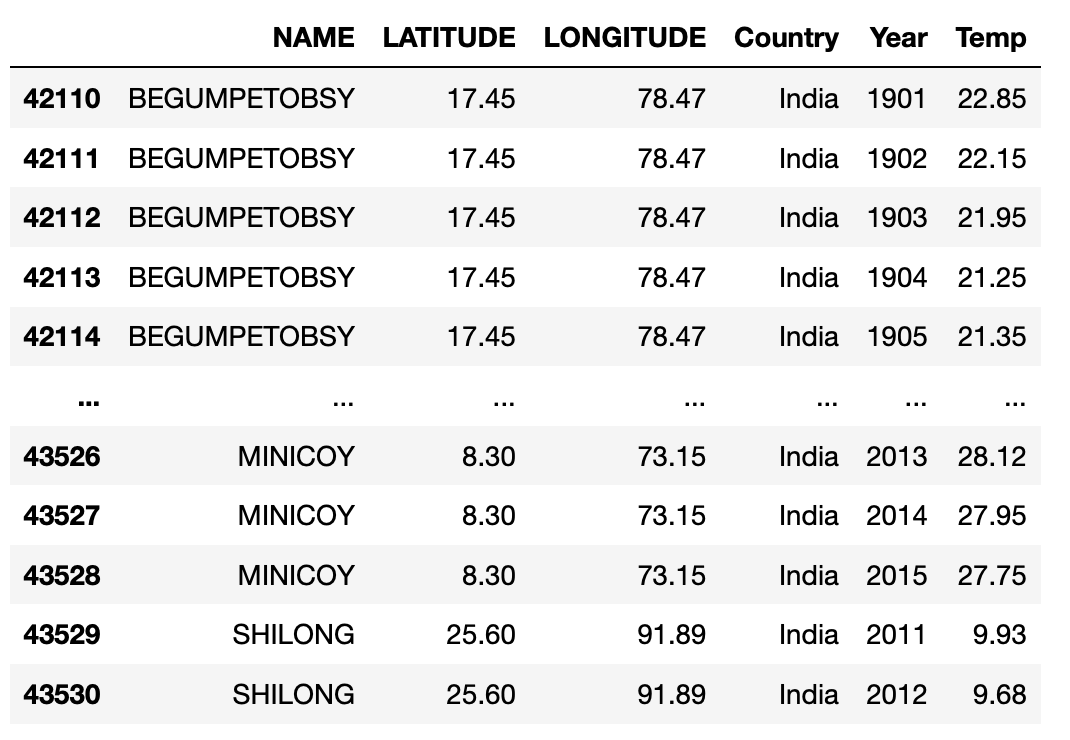

In [7]:
query_climate(df = cleaned_data, country = "India", year_begin = 1901, year_end = 2019, month = 1)

,Station_Name,LATITUDE,LONGITUDE,Country_Name,Year,Month,Temperature
442347,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
442359,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
442371,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
442383,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
442395,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
458116,MINICOY,8.30,73.15,India,2014,1,27.95
458128,MINICOY,8.30,73.15,India,2015,1,27.75
458132,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2013,1,15.30
458142,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

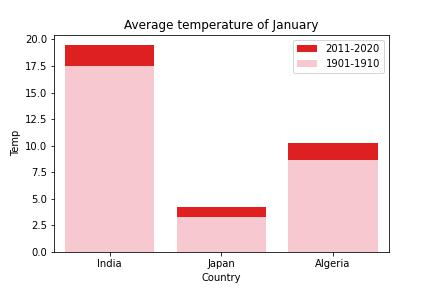

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

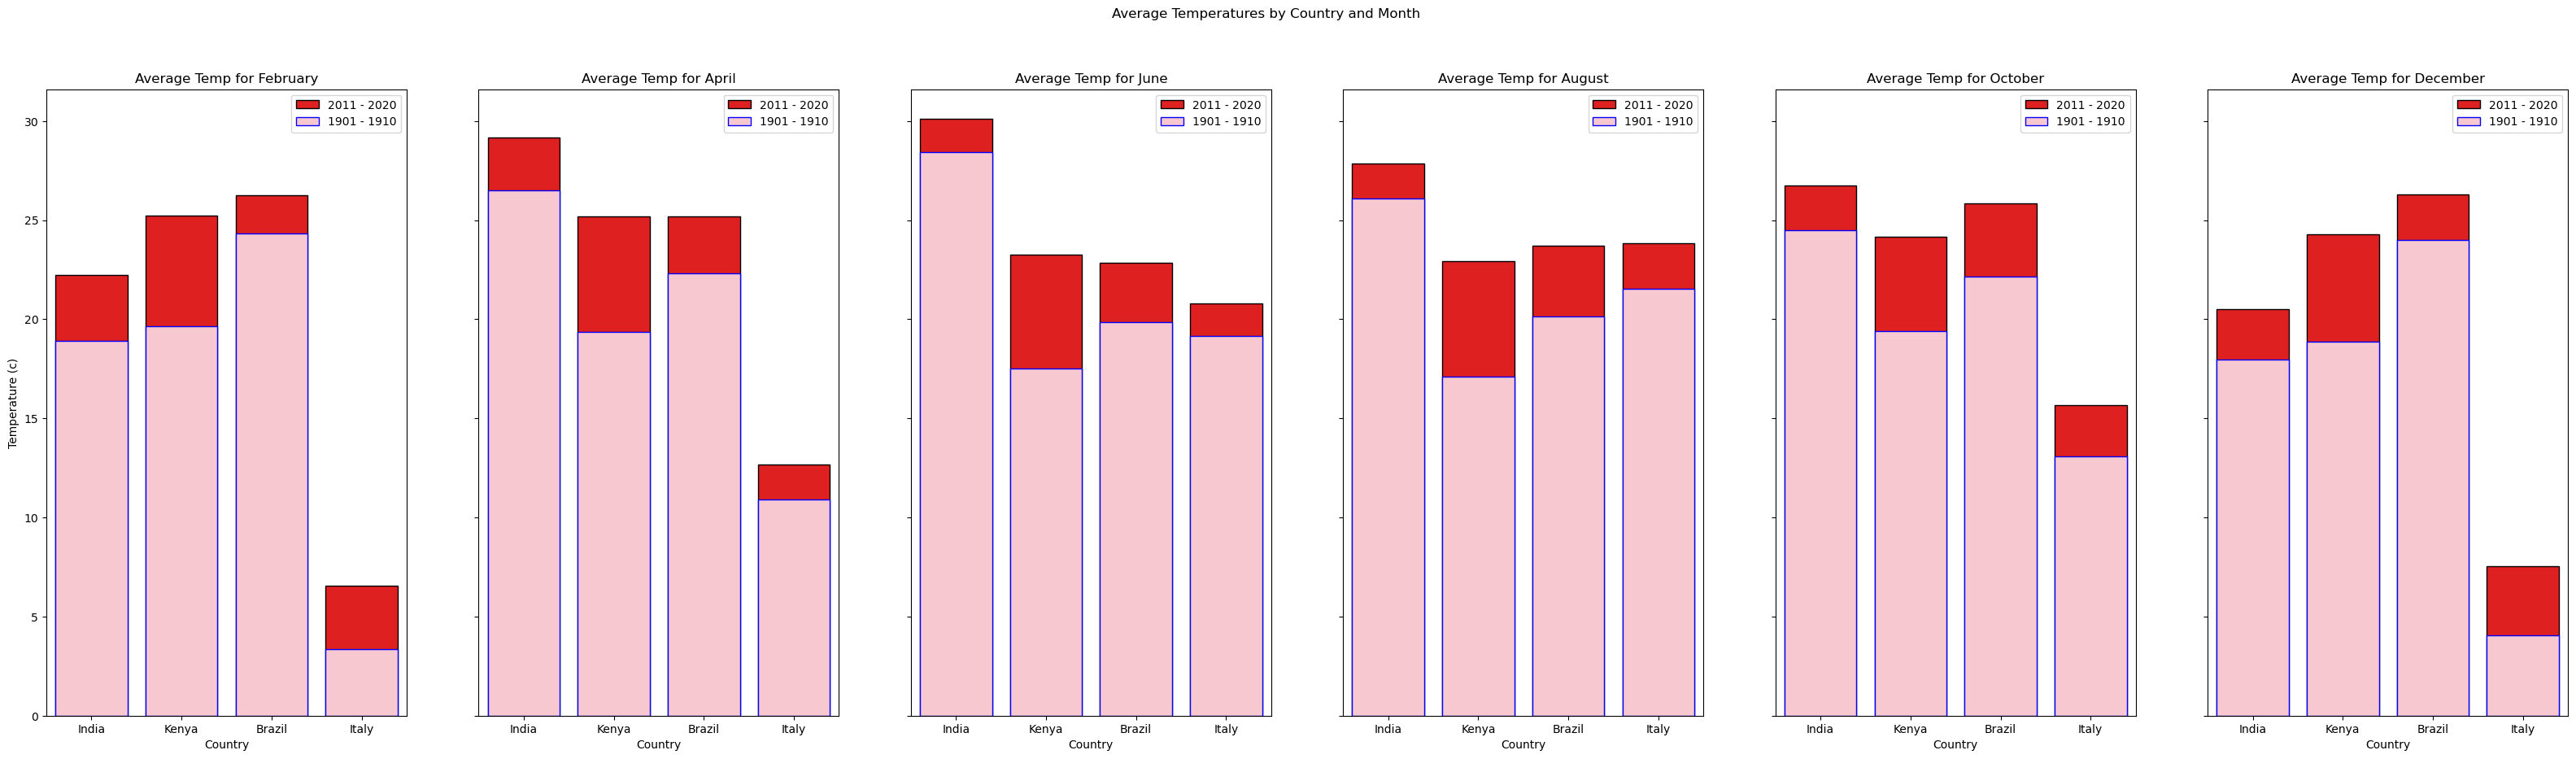

In [8]:
# creates the figure with titles and ylabel
fig, ax = plt.subplots(1,6, figsize = (40,10), sharey = True, sharex = True)
fig.suptitle("Average Temperatures by Country and Month")
ax[0].set_ylabel("Temperature (c)")


# Dict to translate number of month to its name
monthDict = {2:"February", 4: "April", 6: "June", 8: "August", 10: "October", 12:"December"}



def create_subplot(countries, month, start1,end1,start2,end2,location):
    """ Creates a barplot of average temperatures for 2 specified periods
    at a given month for each country in a given list of countries
    
    Parameters:
    countries - list of countries to graph
    month - int, month to graph
    start1,end1,start2,end2 - ints, year range
    location - the axis on which the data is graphed
    """
    
    # np arrays of average temperatures in time periods 1 & 2
    avg_temp_period1 = np.array([])
    avg_temp_period2 = np.array([])
    
    
    # for loop that itterates through given countries 
    for country in countries:
        
        # gets the temps in the given time periods 
        temp_period1 = query_climate(cleaned_data, country, start1, end1, month)
        temp_period2 = query_climate(cleaned_data, country, start2, end2, month)
        
        # appends average temp of that country to the np array
        avg_temp_period1 = np.append(avg_temp_period1,temp_period1["Temperature"].mean())
        avg_temp_period2 = np.append(avg_temp_period2,temp_period2["Temperature"].mean())
        
        
    # draws a barplot of avg temps on the figure 
    sns.barplot(x = countries, y =avg_temp_period2, ax = ax[location], 
                color = "red", edgecolor = "black", label = f"{start2} - {end2}")
    sns.barplot(x = countries, y =avg_temp_period1, ax = ax[location], 
                color = "pink",edgecolor= "blue", label = f"{start1} - {end1}")
    
    
    # adds legend, title, and xlabel
    ax[location].legend()
    ax[location].set_title(f"Average Temp for {monthDict[month]}")
    ax[location].set_xlabel("Country")
    
    
# initializing vars
countries = ["India", "Kenya", "Brazil", "Italy"]
months = [2,4,6,8,10,12]
index = 0


# creates a subplot for each month
for month in months:
    create_subplot(countries, month,1901,1910,2011,2020,index)
    index += 1


It seems to me that generally each country got warmer in the recent years and that they all got warmer by about the same amount of degrees too.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

In the code below we created two df's based on year ranges 1901-1910 and 2011-2020 then we got the average temps of each country in that time frame. Next we calculated the change between average temperatures by subtracting old temperatures from new temperatures. Finally we color code the bars by temperature change value and plot the data. Clearly we can see that most countries got a bit warmer showing trends of global warmings. Additionally this helps us visuallize some peculiar outliers like one country getting almost 15 degrees colder, which we suspect is an issue of the data not global environment.

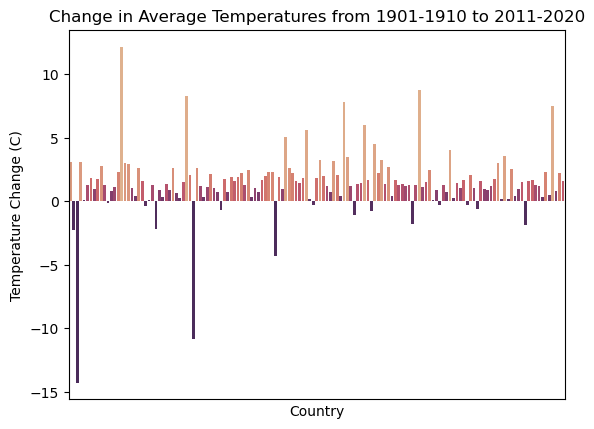

In [9]:
# creates seperate df's based on year ranges
old_df = cleaned_data[(cleaned_data["Year"] >= 1901) & (cleaned_data["Year"] <= 1910)]
new_df = cleaned_data[(cleaned_data["Year"] >= 2011) & (cleaned_data["Year"] <= 2020)]

# gets the average temperature by country for each year range
old_temps = old_df.groupby(["Country_Name"])["Temperature"].mean()
new_temps = new_df.groupby(["Country_Name"])["Temperature"].mean()

# calculates the change in temps and drops na values
change_df = (new_temps - old_temps).to_frame()
change_df = change_df.dropna().reset_index()


# Used the query below to figure out how to color code based on y-value
# https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot

# basically sorts the temperatures and assigns each country its own shade of the color
pal = sns.color_palette("flare", len(change_df))
rank = change_df["Temperature"].argsort().argsort() 

#plots the data
sns.barplot(data = change_df, x = "Country_Name", y = "Temperature", palette=np.array(pal[::-1])[rank])
plt.xticks(ticks=[])

# sets titles and axis labels
plt.title("Change in Average Temperatures from 1901-1910 to 2011-2020")
plt.xlabel("Country")
plt.ylabel("Temperature Change (C)");

In the code below we use seaborn scatterplot to plot the average latitudes of countries on the x-axis and their average temperatures on the y-axis. We can clearly observe that the data follows an exponential pattern and we can tinker around and create a line that represents this relationship. Note that the line I created was done via trial and error not any sophisticated machine learning algorithm, hence it is not without bias. This data demonstrates the relationship of temperature to latitude and confirms our intuition that countries further from the equator are generally colder.

Text(0, 0.5, 'Average Temperature (C)')

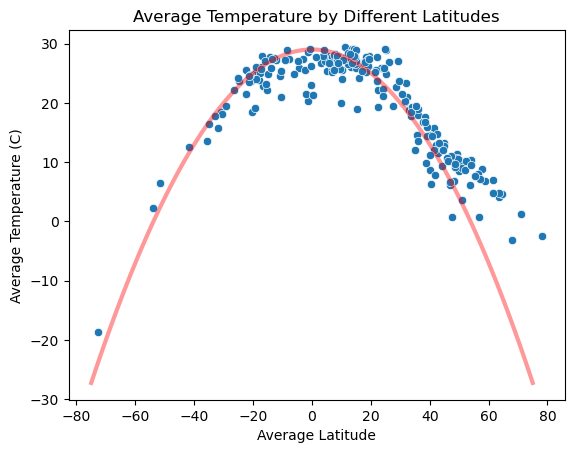

In [10]:
# creates pd series of average temps by country and average latitude
averageTemps = cleaned_data.groupby(["Country_Name"])["Temperature"].mean()
averageLat = cleaned_data.groupby(["Country_Name"])["LATITUDE"].mean()

# formula for parabola that we graph on top of the scatter plot
lineX = np.linspace(-75,75,101)
lineY = -.01* (lineX**2) + 29

# graphs the series and the parabola
sns.scatterplot(y = averageTemps, x= averageLat)
sns.lineplot(x=lineX,y=lineY, color= "red", alpha = 0.4, linewidth = 3)

# sets titles and axis labels
plt.title("Average Temperature by Different Latitudes")
plt.xlabel("Average Latitude")
plt.ylabel("Average Temperature (C)")

In the code below we plot average temperatures of different countries by month. Overall this graph showcases how volatile some countries' temperatures are to the month it was recorded, for example we can see that Russia gets significantly warmer in the summer and that Kenya stays consistently hot throughout the entire year. Also it is interesting to note that countries in South Hemisphere get colder during Summer.

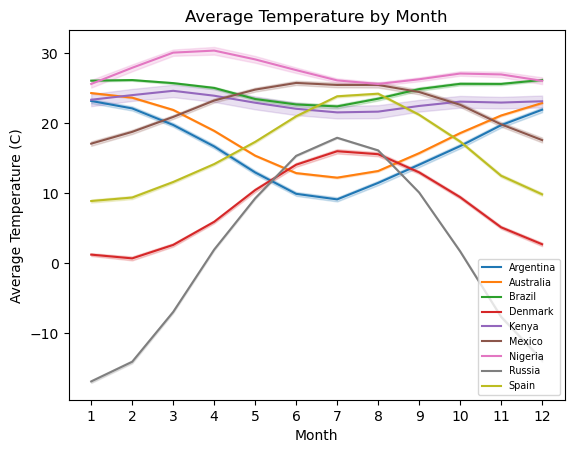

In [11]:
# list of countries to plot
countries = ["Russia","Mexico","Brazil","Kenya","Chine","Australia","Spain","Denmark", "Argentina", "Nigeria"]

# creates a df with entries consisting of only countries in the specified list
select_df = cleaned_data[cleaned_data["Country_Name"].isin(countries)]

# plots the data
sns.lineplot(data=select_df, x= "Month", y= "Temperature", hue = "Country_Name")


# sets titles, axis labels, and legend
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Temperature (C)")
plt.legend(fontsize = "x-small", loc = "lower right")

## Publish (5 pts)

Publish your work on quarto and github:

1. Publish your work using `quarto publish`. Please include your blog link. 

2. Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link. 


The link for the github repo: https://github.com/Feugon/HW.git